In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# import raw data
# raw data is downloaded from https://www.kaggle.com/zillow/zecon#Zip_time_series.csv
raw_data = pd.read_csv("Zip_time_series.csv")

In [3]:
# get size of data
raw_data.shape

(4383885, 76)

In [4]:
# subset data to focus exploratory analysis on single zip code
# zip code selected as 30309 for Atlanta Midtown
data_30309_inventory_price = raw_data[raw_data['RegionName']==30309]

# select relevant features inventory and listing price the for 1st plot
data_30309_plot_1 = data_30309_inventory_price[['Date','InventoryRaw_AllHomes','MedianListingPrice_AllHomes']]

In [5]:
#data_30309_plot_1.select_dtypes(include=[np.datetime64])

In [6]:
# set column Date as the index for later time series ploting and remove NA
data_30309_plot_1= data_30309_plot_1.dropna()
data_30309_plot_1.select_dtypes(include=[np.datetime64])
data_30309_plot_1.index = data_30309_plot_1['Date']
del data_30309_plot_1['Date']
data_30309_plot_1.head()

,InventoryRaw_AllHomes,MedianListingPrice_AllHomes
Date,,
2010-01-31,506.0,224900.0
2010-02-28,514.0,225900.0
2010-03-31,544.0,229900.0
2010-04-30,599.0,228000.0
2010-05-31,578.0,228750.0


<Figure size 432x288 with 0 Axes>

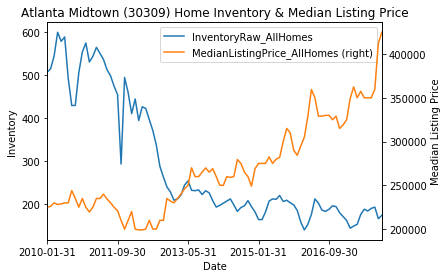

In [7]:
# Plot historical home inventory vs listing price
# For zip code 30309, inventory reduced to historical-low level while avg price increased more 2 folds
# The plot suggests a stronger seller market

plt.figure()

ax = data_30309_plot_1.plot(secondary_y=['MedianListingPrice_AllHomes'])
ax.set_ylabel('Inventory')
ax.right_ax.set_ylabel('Meadian Listing Price')
plt.title("Atlanta Midtown (30309) Home Inventory & Median Listing Price")

plt.show()

In [8]:
# select relevant features inventory and percent of listing with discount for the 2nd plot
data_30309_inv_reduction = raw_data[raw_data['RegionName']==30309]
data_30309_plot_2 = data_30309_inv_reduction[['Date','InventoryRaw_AllHomes','PctOfListingsWithPriceReductions_AllHomes']]


In [9]:
# set column Date as the index for later time series ploting and remove NA
data_30309_plot_2 = data_30309_plot_2.dropna()
data_30309_plot_2.select_dtypes(include=[np.datetime64])
data_30309_plot_2.index = data_30309_plot_2['Date']
del data_30309_plot_2['Date']
data_30309_plot_2.columns=['InventoryRaw', '%WithPriceCut']
data_30309_plot_2.head()

,InventoryRaw,%WithPriceCut
Date,,
2010-09-30,429.0,15.989515
2010-10-31,505.0,15.984148
2010-11-30,553.0,10.405405
2010-12-31,574.0,10.689170
2011-01-31,530.0,13.304721


<Figure size 432x288 with 0 Axes>

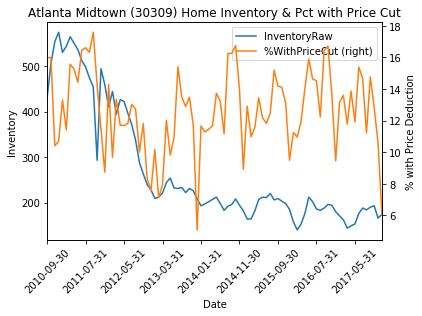

In [10]:
# Plot historical home inventory and percent of listings with discount
# For zip code 30309, percent of listings with discount experienced much more variations compared to inventory
# The plot suggests other underlying factors to drive the sales/promotions of property markets

plt.figure()

ax = data_30309_plot_2.plot(secondary_y=['%WithPriceCut'])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Inventory')
ax.right_ax.set_ylabel('% with Price Deduction')
plt.title("Atlanta Midtown (30309) Home Inventory & Pct with Price Cut")

plt.show()

In [11]:
# select relevant features inventory and percent of listing with discount for the 3rd plot

data_30309_inv_list_value = raw_data[raw_data['RegionName']==30309]
data_30309_plot_3 = data_30309_inv_list_value[['Date','InventoryRaw_AllHomes','MedianListingPrice_AllHomes','ZHVI_AllHomes']]
data_30309_plot_3.head()

,Date,InventoryRaw_AllHomes,MedianListingPrice_AllHomes,ZHVI_AllHomes
4818,1996-04-30,NaN,NaN,131000.0
18435,1996-05-31,NaN,NaN,132300.0
32222,1996-06-30,NaN,NaN,133400.0
46039,1996-07-31,NaN,NaN,136700.0
59865,1996-08-31,NaN,NaN,140200.0


In [12]:
# set column Date as the index for later time series ploting and remove NA

data_30309_plot_3 = data_30309_plot_3.dropna()
data_30309_plot_3.select_dtypes(include=[np.datetime64])
data_30309_plot_3.index = data_30309_plot_3['Date']
del data_30309_plot_3['Date']

In [13]:
# compute percent of permium of listing price over instrinsic property values
data_30309_plot_3['%Premium_over_value'] = 100*(data_30309_plot_3['MedianListingPrice_AllHomes']-data_30309_plot_3['ZHVI_AllHomes'])/data_30309_plot_3['ZHVI_AllHomes']
data_30309_plot_3 = data_30309_plot_3[['InventoryRaw_AllHomes','%Premium_over_value']]
data_30309_plot_3.head()

,InventoryRaw_AllHomes,%Premium_over_value
Date,,
2010-01-31,506.0,4.946337
2010-02-28,514.0,6.657224
2010-03-31,544.0,9.009009
2010-04-30,599.0,8.778626
2010-05-31,578.0,9.923114


<Figure size 432x288 with 0 Axes>

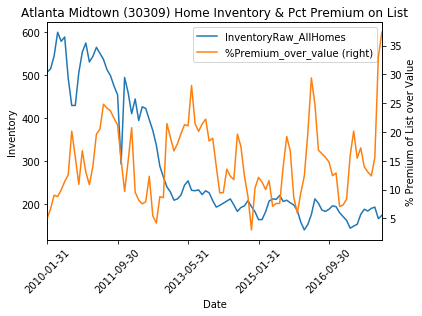

In [14]:
# Plot historical home inventory vs premium of listing price over instrinsic value
# For zip code 30309, percent of premium over the intrinsic value experienced much more variations compared to inventory
# percent of premium also demonstrates some seasonal patterns
# The plot suggests other underlying factors to drive the listing price of property markets

plt.figure()

ax = data_30309_plot_3.plot(secondary_y=['%Premium_over_value'])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Inventory')
ax.right_ax.set_ylabel('% Premium of List over Value')
plt.title("Atlanta Midtown (30309) Home Inventory & Pct Premium on List")

plt.show()